In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train_data_attrition.csv')
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,...,80,3,2,3,3,1,1,0,0,No
1,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,...,80,0,0,2,3,0,0,0,0,No
2,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,...,80,1,10,2,3,3,2,0,2,No
3,39,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,4,...,80,0,7,3,3,5,4,1,0,No
4,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,2,...,80,1,10,2,3,10,8,0,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,35,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,2,...,80,2,10,3,2,10,9,6,8,No
1172,41,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,2,...,80,0,11,3,1,3,2,1,2,No
1173,22,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,3,...,80,1,1,5,3,0,0,0,0,Yes
1174,29,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,...,80,1,10,2,3,4,3,0,3,No


In [5]:
# kiểm tra đảm bảo không có giá trị bị thiếu
df['Attrition'].isnull().sum()

np.int64(0)

Kiểm tra

In [6]:
# Đếm số lượng mẫu theo lớp
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

# Tính tỷ lệ phần trăm
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_percent)

Attrition
No     978
Yes    198
Name: count, dtype: int64
Attrition
No     83.163265
Yes    16.836735
Name: proportion, dtype: float64


Trong ví dụ này, lớp "No" chiếm 83.2%, lớp "Yes" chiếm 16.8% → Dữ liệu mất cân bằng (lớp "Yes" là lớp thiểu số).

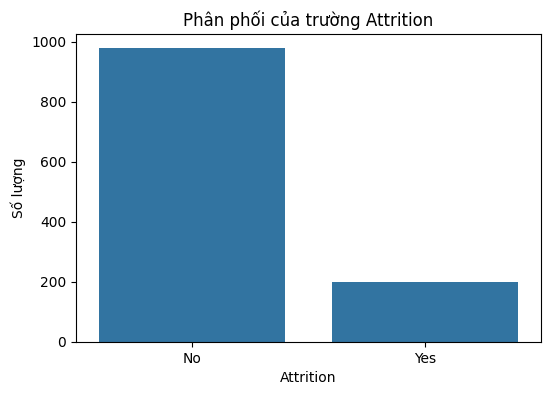

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Phân phối của trường Attrition')
plt.xlabel('Attrition')
plt.ylabel('Số lượng')
plt.show()

cột "No" cao gấp nhiều lần cột "Yes"

Đánh giá mức độ mất cân bằng

Tỷ lệ mất cân bằng (Imbalance Ratio): Tính tỷ lệ giữa lớp đa số và lớp thiểu số:
Ta có 978 mẫu "No" và 198 mẫu "Yes", tỷ lệ là 978 / 198 ≈ 4.9:1.

Ngưỡng đánh giá:

Tỷ lệ < 2:1: Dữ liệu được coi là cân bằng hoặc ít mất cân bằng.

Tỷ lệ 2:1 đến 4:1: Mất cân bằng nhẹ.

Tỷ lệ > 4:1: Mất cân bằng đáng kể.

Tỷ lệ > 10:1: Mất cân bằng nghiêm trọng.

Kết luận: dữ liệu mất cân bằng đáng kể

## Vài hướng xử lý dữ liệu mất cân bằng
1. Tái Lấy Mẫu (Resampling)

a. Oversampling (Tăng mẫu lớp thiểu số)

-Mô tả: Tăng số lượng mẫu của lớp thiểu số bằng cách sao chép ngẫu nhiên hoặc tạo mẫu tổng hợp.

-Phương pháp phổ biến:

+ Random Oversampling: Sao chép ngẫu nhiên các mẫu từ lớp thiểu số.
+ SMOTE (Synthetic Minority Oversampling Technique): Tạo mẫu tổng hợp dựa trên các mẫu hiện có của lớp thiểu số.

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Identify categorical columns (excluding the target variable)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Remove the target variable if it's in the list
if 'Attrition' in categorical_cols:
    categorical_cols.remove('Attrition')

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True to avoid multicollinearity

X = df_encoded.drop('Attrition', axis=1)  # Features (now encoded)
y = df_encoded['Attrition']  # Target variable (assuming it's already numerical if 'No'/'Yes')
# If 'Attrition' is still 'Yes'/'No', you might need to map it to 1/0
# y = y.map({'Yes': 1, 'No': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check distribution after SMOTE
print(pd.Series(y_train_resampled).value_counts())

Attrition
No     787
Yes    787
Name: count, dtype: int64


b. Undersampling (Giảm mẫu lớp đa số)

-Mô tả: Giảm số lượng mẫu của lớp đa số để cân bằng với lớp thiểu số.

-Phương pháp phổ biến:

* Random Undersampling: Loại bỏ ngẫu nhiên các mẫu từ lớp đa số.
* Tomek Links: Loại bỏ các mẫu lớp đa số gần với lớp thiểu số.

In [21]:
from imblearn.under_sampling import RandomUnderSampler

# Áp dụng Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Kiểm tra phân phối sau undersampling
print(pd.Series(y_train_resampled).value_counts())

Attrition
No     153
Yes    153
Name: count, dtype: int64


2. Sử Dụng Trọng Số Lớp (Class Weighting)

-Mô tả: Gán trọng số cao hơn cho lớp thiểu số trong hàm mất mát của thuật toán để mô hình chú ý hơn đến lớp này.

-Cách thực hiện:

+ Nhiều thuật toán học máy (như Logistic Regression, Random Forest, SVM) hỗ trợ tham số class_weight.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình với class_weight='balanced'
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

hoặc tự tính trọng số

In [23]:
class_weights = {'No': 1.0, 'Yes': 5.0}# Trọng số cao hơn cho lớp thiểu số (Yes)

model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={'No': 1.0, 'Yes': 5.0}, random_state=42)

3. Thu Thập Thêm Dữ Liệu

-Mô tả: Thu thập thêm mẫu cho lớp thiểu số nếu có thể.

-Cách thực hiện:

+ Trong bài toán Attrition, bạn có thể thu thập thêm dữ liệu từ các nguồn khác (ví dụ: hồ sơ nhân viên cũ, khảo sát).
+ Nếu không thể thu thập, xem xét sử dụng dữ liệu tổng hợp từ các kỹ thuật như SMOTE.

4. Sử Dụng Thuật Toán Phù Hợp

-Mô tả: Một số thuật toán ít nhạy cảm với dữ liệu mất cân bằng hơn, như:

+ Random Forest, Gradient Boosting (XGBoost, LightGBM): Có thể xử lý mất cân bằng tốt hơn nhờ cơ chế tập trung vào lỗi dự đoán.
+ Ensemble Methods: Kết hợp nhiều mô hình để cải thiện hiệu suất.

In [24]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are already split and X_train is encoded
# (This part of the code is not shown in the traceback, but it's implied
# from the context of the notebook cells)

# Convert 'Yes'/'No' in y_train to 1/0
y_train_numeric = y_train.map({'Yes': 1, 'No': 0})

# Convert 'Yes'/'No' in y_test to 1/0 (good practice to convert test set as well)
# You'll need to have y_test available. If it was split from y, you'd convert it like this:
# y_test_numeric = y_test.map({'Yes': 1, 'No': 0})


# Khởi tạo mô hình với scale_pos_weight
# scale_pos_weight = count(negative class) / count(positive class)
# In this case, count('No') / count('Yes')
# You can calculate this from the original or training data
# Assuming from the earlier notebook output (978 No, 198 Yes in original data)
# For the training set after split, you might need to recalculate:
# pos_count = y_train_numeric.sum() # Number of 'Yes' (1s)
# neg_count = (y_train_numeric == 0).sum() # Number of 'No' (0s)
# scale_pos_weight_value = neg_count / pos_count
# print(f"Calculated scale_pos_weight: {scale_pos_weight_value}")
# Using the approximate value from the description (978/198 ≈ 4.9), 5 is a reasonable approximation
# model = XGBClassifier(scale_pos_weight=scale_pos_weight_value, random_state=42)

# Using the value 5 as specified in the original code
model = XGBClassifier(scale_pos_weight=5, random_state=42)

# Fit the model using the numerically encoded y_train
model.fit(X_train, y_train_numeric)

# You can now use model.predict() or model.predict_proba() with X_test
# Remember to use y_test_numeric if evaluating performance metrics that require the true labels

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

5. Sử Dụng Độ Đo Đánh Giá Phù Hợp

_Mô tả: Tránh sử dụng accuracy vì nó có thể bị đánh giá sai lệch. Thay vào đó, sử dụng:

+ Precision, Recall, F1-Score: Đặc biệt chú ý đến Recall và F1-Score của lớp thiểu số.
+ AUC-ROC: Đo lường khả năng phân biệt giữa các lớp.

In [25]:
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd # Import pandas if not already imported in this cell

# Assuming X_test, y_test, model, and y_pred are available from previous cells

# Convert 'Yes'/'No' in y_test to 1/0
# This ensures y_test has the same format as the predictions y_pred (0 or 1)
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

# Dự đoán (y_pred is already numerical from model.predict)
y_pred = model.predict(X_test) # This line is likely already executed before this cell

# Đánh giá - Use y_test_numeric for comparison
print(classification_report(y_test_numeric, y_pred))

# AUC-ROC also requires numerical true labels (y_test_numeric)
# model.predict_proba(X_test)[:, 1] gives probabilities for the positive class (1)
print("AUC-ROC:", roc_auc_score(y_test_numeric, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       191
           1       0.71      0.44      0.55        45

    accuracy                           0.86       236
   macro avg       0.80      0.70      0.73       236
weighted avg       0.85      0.86      0.85       236

AUC-ROC: 0.8803955788248982


6. Kết Hợp Nhiều Kỹ Thuật

-Thường thì kết hợp các kỹ thuật trên sẽ mang lại hiệu quả tốt hơn:

+ Ví dụ: Sử dụng SMOTE để cân bằng dữ liệu, sau đó áp dụng class weighting trong mô hình Random Forest.
+ Thử nghiệm nhiều cách và so sánh hiệu suất trên tập kiểm tra.

## Khám phá các kỹ thuật xử lý các tập dữ liệu mất cân bằng với Downsampling, SMOTE và k-fold.

1. Downsampling (Undersampling)
- Mô tả: Giảm số lượng mẫu của lớp đa số (No) để cân bằng với lớp thiểu số (Yes) bằng cách loại bỏ ngẫu nhiên một phần dữ liệu lớp đa số.
- Ưu điểm: Giảm thời gian huấn luyện, đơn giản hóa dữ liệu.
- Nhược điểm: Có thể làm mất thông tin quan trọng nếu loại bỏ quá nhiều mẫu.

In [14]:

X = df.drop('Attrition', axis=1)
y = df['Attrition']
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng Downsampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Kiểm tra phân phối sau Downsampling
print(pd.Series(y_train_resampled).value_counts())

Attrition
No     153
Yes    153
Name: count, dtype: int64


Nhận xét:
- kết quả của Downsampling tương tự như Undersampling nhưng Undersampling dùng để giảm số lượng mẫu (lớp đa số). Còn Downsampling đôi khi dùng để chỉ việc giảm kích thước tập dữ liệu nói chung (không chỉ theo lớp).

2. SMOTE (Synthetic Minority Oversampling Technique)
- Mô tả: Tạo mẫu tổng hợp cho lớp thiểu số (Yes) bằng cách nội suy giữa các điểm lân cận trong không gian đặc trưng, thay vì chỉ sao chép ngẫu nhiên.
- Ưu điểm: Giảm nguy cơ overfitting so với oversampling đơn giản, tăng dữ liệu lớp thiểu số một cách thông minh.
- Nhược điểm: Có thể tạo ra nhiễu nếu dữ liệu có quá nhiều nhiễu hoặc chiều không gian cao.

In [26]:
from imblearn.over_sampling import SMOTE

# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra phân phối sau SMOTE
print(pd.Series(y_train_resampled).value_counts())

Attrition
No     787
Yes    787
Name: count, dtype: int64


3. k-fold Cross-Validation
- Mô tả: Chia dữ liệu thành k tập con (folds), sử dụng k-1 fold để huấn luyện và 1 fold để kiểm tra, lặp lại k lần. Kỹ thuật này không trực tiếp xử lý mất cân bằng nhưng giúp đánh giá hiệu suất mô hình trên dữ liệu mất cân bằng một cách công bằng, đặc biệt khi kết hợp với các kỹ thuật resampling.
- Ưu điểm: Giảm thiểu rủi ro overfitting, cung cấp đánh giá ổn định hơn.
- Nhược điểm: Tăng thời gian tính toán, cần kết hợp với resampling để xử lý mất cân bằng.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình
model = RandomForestClassifier(random_state=42)

# Áp dụng k-fold CV (k=5)
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("F1-Score trung bình qua 5 folds:", cv_scores.mean())
print("Độ lệch chuẩn:", cv_scores.std())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['No' 'Yes']

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/

F1-Score trung bình qua 5 folds: nan
Độ lệch chuẩn: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['No' 'Yes']

  warnings.warn(


đoạn code bị lỗi F1-Score trung bình qua 5 folds: nan và Độ lệch chuẩn: nan, vì ta vẫn để attrion là Yes và No. Ta sửa lại như sau.

In [29]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa cột Attrition
le = LabelEncoder()
y = le.fit_transform(df['Attrition'])  # 'No' -> 0, 'Yes' -> 1
y_train = le.transform(y_train)
y_train_resampled = le.transform(y_train_resampled)

# Khởi tạo mô hình
model = RandomForestClassifier(random_state=42)

# Áp dụng k-fold CV (k=5)
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("F1-Score trung bình qua 5 folds:", cv_scores.mean())
print("Độ lệch chuẩn:", cv_scores.std())

F1-Score trung bình qua 5 folds: 0.8848008976181951
Độ lệch chuẩn: 0.155116816027951


## Khi làm việc với dữ liệu mất cân bằng (như trường Attrition với lớp thiểu số "Yes" và lớp đa số "No"), các số liệu đánh giá truyền thống như Độ chính xác (Accuracy) có thể không phản ánh đúng hiệu suất mô hình. Vì vậy ta sử các cách để đo độ chính xác ngoài (Accuracy): Thu hồi (Recall), Điểm F1 (F1-Score), và Đường cong ROC (Receiver Operating Characteristic Curve).

1. Độ chính xác (Accuracy)

- Định nghĩa: Là tỷ lệ dự đoán đúng trên tổng số mẫu.

- Công thức:
$$\text{Accuracy} = \frac{\text{Số mẫu dự đoán đúng}}{\text{Tổng số mẫu}}$$

- Với ma trận nhầm lẫn:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
(TP: True Positive, TN: True Negative, FP: False Positive, FN: False Negative).


- Ý nghĩa: Đo lường mức độ tổng quát của mô hình trong việc dự đoán đúng cả hai lớp.
- Hạn chế với dữ liệu mất cân bằng: Nếu lớp đa số (No) chiếm 90%, mô hình chỉ cần dự đoán toàn bộ là "No" cũng đạt Accuracy 90%, dù hoàn toàn thất bại với lớp thiểu số (Yes). Do đó, Accuracy không phù hợp để đánh giá hiệu suất trên lớp thiểu số.
- Ứng dụng với Attrition: Chỉ nên dùng làm tham chiếu, không phải số liệu chính.

2. Thu hồi (Recall - Độ nhạy)

- Định nghĩa: Là tỷ lệ các mẫu thực sự thuộc lớp dương (Yes) được mô hình dự đoán đúng.

- Công thức:
$$\text{Recall} = \frac{TP}{TP + FN}$$



- Ý nghĩa: Đo lường khả năng mô hình phát hiện đúng các trường hợp nghỉ việc (Yes). Quan trọng khi lớp thiểu số (Yes) là mục tiêu chính (ví dụ: muốn giảm thiểu FN - bỏ sót nhân viên nghỉ việc).
- Hạn chế: Có thể tăng Recall bằng cách dự đoán nhiều mẫu là Yes, nhưng dẫn đến tăng FP (False Positive), làm giảm Precision.
- Ứng dụng với Attrition: Phù hợp để đánh giá khả năng phát hiện nhân viên có nguy cơ nghỉ việc.

3. Điểm F1 (F1-Score)

- Định nghĩa: Là trung bình điều hòa của Precision (Độ chính xác dương) và Recall, cân bằng giữa hai chỉ số này.

- Công thức:
$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
(Precision = $ \frac{TP}{TP + FP} $).


- Ý nghĩa: Cung cấp một số liệu tổng hợp khi cả Precision và Recall đều quan trọng. Thích hợp cho dữ liệu mất cân bằng vì nó tập trung vào hiệu suất trên lớp thiểu số mà không bị thiên lệch bởi lớp đa số.
- Hạn chế: Có thể không phản ánh toàn diện nếu ưu tiên Recall hoặc Precision khác nhau tùy ngữ cảnh.
- Ứng dụng với Attrition: Là chỉ số lý tưởng để đánh giá mô hình, đặc biệt khi cần cân bằng giữa phát hiện nghỉ việc (Recall) và tránh dự đoán sai (Precision).

4. Đường cong ROC (Receiver Operating Characteristic Curve)

- Định nghĩa: Là đồ thị biểu diễn mối quan hệ giữa True Positive Rate (TPR - Recall) và False Positive Rate (FPR) tại các ngưỡng phân lớp khác nhau.

- Công thức:

$ TPR = \frac{TP}{TP + FN} $ (Recall)
$ FPR = \frac{FP}{FP + TN} $




- Ý nghĩa:

Đường cong ROC giúp đánh giá khả năng phân biệt giữa các lớp của mô hình. Mô hình tốt sẽ có đường cong gần sát góc trên bên trái (TPR cao, FPR thấp).
Diện tích dưới đường cong (AUC - Area Under Curve): Giá trị AUC từ 0 đến 1, trong đó:

AUC = 1: Mô hình hoàn hảo.

AUC = 0.5: Mô hình ngẫu nhiên.

AUC < 0.5: Mô hình tệ hơn ngẫu nhiên.




- Hạn chế: AUC không nhạy với sự mất cân bằng nghiêm trọng, vì nó xem xét cả TPR và FPR mà không ưu tiên lớp thiểu số. Nên kết hợp với PR-AUC (Precision-Recall AUC) trong trường hợp mất cân bằng.
- Ứng dụng với Attrition: Dùng ROC-AUC để đánh giá tổng quát khả năng phân loại giữa "Yes" và "No", nhưng cần kiểm tra thêm PR-AUC nếu lớp "Yes" quá nhỏ.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE # Assuming SMOTE was the intended final resampling method

# Re-initialize X and y from the original DataFrame
# This ensures we start fresh for splitting and encoding
X = df_encoded.drop('Attrition', axis=1) # Use the already one-hot encoded features
y = df_encoded['Attrition'] # Use the original Attrition column

# Map the target variable 'Attrition' to numerical values before splitting
# This is crucial for SMOTE and metrics like recall_score(pos_label=1)
# Only do this if 'Attrition' is still 'Yes'/'No'. If it was already mapped earlier, skip this line.
if y.dtype == 'object':
    le = LabelEncoder()
    y_numeric = le.fit_transform(y) # 'No' -> 0, 'Yes' -> 1
else:
    # Assuming it's already numerical if not object type
    y_numeric = y

# Split the data using the numerical target variable
X_train, X_test, y_train_numeric, y_test_numeric = train_test_split(X, y_numeric, test_size=0.2, random_state=42, stratify=y_numeric) # Use stratify to maintain class distribution

# Apply SMOTE to the training data (assuming this is the preferred resampling)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled_numeric = smote.fit_resample(X_train, y_train_numeric)

# Khởi tạo mô hình
model = RandomForestClassifier(random_state=42)

# Áp dụng k-fold CV (k=5) to evaluate the model on the resampled data during training
# Note: This line evaluates, but doesn't fit the 'model' object used later
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled_numeric, cv=5, scoring='f1')
print("F1-Score trung bình qua 5 folds (CV):", cv_scores.mean())
print("Độ lệch chuẩn (CV):", cv_scores.std())

# --- FIX START ---
# Explicitly fit the model on the *entire* resampled training data
# This fitted 'model' object will then be used for prediction on the test set
model.fit(X_train_resampled, y_train_resampled_numeric)
# --- FIX END ---

# Now, proceed to the evaluation cell. The model is now fitted.
# Make sure the last evaluation cell uses y_test_numeric for metrics.

F1-Score trung bình qua 5 folds (CV): 0.8873377502515973
Độ lệch chuẩn (CV): 0.1510273211672275


RandomForestClassifier(random_state=42)

Accuracy: 0.84
Recall: 0.38
F1-Score: 0.45
ROC-AUC: 0.76


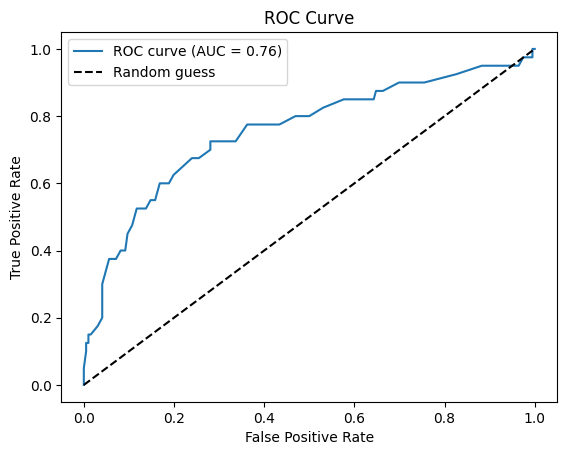

In [32]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Assuming X_test, y_test_numeric, and the fitted 'model' are available from the previous cell

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test) # Use the fitted model
y_pred_prob = model.predict_proba(X_test)[:, 1] # Use the fitted model

# Tính các số liệu - Use y_test_numeric as the true labels
accuracy = accuracy_score(y_test_numeric, y_pred)
recall = recall_score(y_test_numeric, y_pred, pos_label=1)  # Use pos_label=1 for 'Yes' class
f1 = f1_score(y_test_numeric, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test_numeric, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Vẽ ROC Curve - Use y_test_numeric as the true labels
fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_prob, pos_label=1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

So sánh và ứng dụng với Attrition
- Độ chính xác (Accuracy): Không đáng tin cậy cho Attrition nếu lớp "No" chiếm ưu thế (ví dụ: 90%), vì mô hình có thể bỏ qua lớp "Yes".
- Thu hồi (Recall): Quan trọng nếu mục tiêu là phát hiện tối đa nhân viên nghỉ việc, ngay cả khi có sai sót (FP).
- Điểm F1: Tốt nhất để cân bằng giữa phát hiện nghỉ việc và độ chính xác dự đoán, phù hợp cho bài toán Attrition.
- Đường cong ROC/AUC: Hữu ích để so sánh tổng quát hiệu suất mô hình, nhưng nên kết hợp với PR-AUC để tập trung vào lớp "Yes".